# <center>Lot rakiety</center>
### <center>Równania różniczkowe w technice - projekt do kursu</center>

<center>Martyna Maciaszek (268737)</center>

<center> Aleksander Rzyhak (268766)</center>

<center>15 stycznia 2023</center>

# Funkcje używane w symulacjach

In [1]:
using Plots

######
#energie i krzywe
######

function air_resistance(d, v, cd, A)
    v = v.*1000
    F = (0.5*(d*cd*A)*v.^2) 
    F = F/1000
    return F
end

density(x) = exp(x*(-0.11185156657421796)+0.22802882517745254) #dopasowany do danych

function gForce(r, m)
    G = [6.67, -20]
    M = [5.97, 24]
    F = [G[1]*m*M[1]/r^2, G[2]+M[2]]
    F = [F[1] * 10^F[2], 0]
    return F
end

function get_angle(P)
    c = complex(P[1], P[2])
    return angle(c)
end

function get_length(P)
    r = sqrt(P[1]^2+P[2]^2)
    return r
end

function rotate_vector(V, α)
    W = [V[1]cos(α) - V[2]sin(α), V[2]cos(α) + V[1]sin(α)]
    return W
end

function new_v(v, F, m)
    ΔV = F ./ m
    v = v - ΔV
    return v
end

function trajectory(r₀, v₀, m, cd, A, T, n)
    P = [r₀, 0]
    v = v₀
    X = Vector{Float64}(undef, T+1)
    Y = Vector{Float64}(undef, T+1)
    V = Vector{Vector{Float64}}(undef, T+1)
    H = Vector{Float64}(undef, T+1)
    X[1], Y[1] = P
    V[1] = v
    H[1] = sqrt(P[1]^2+P[2]^2)
    for t in 2:(T*n)
        P += v
        F = gForce(get_length(P), m)
        α = get_angle(P)
        F = rotate_vector(F, α)
        F -= air_resistance(density(sqrt(P[1]^2+P[2]^2)-6371), v, cd, A)
        v = new_v(v, F, m)
        if mod(t, n) == 0
            X[Int(t/n)+1], Y[Int(t/n)+1] = P
            V[Int(t/n)+1] = v
            H[Int(t/n)+1] = sqrt(P[1]^2+P[2]^2)
        end
    end
    return X, Y, V, H
end

function pure_trajectory(r₀, v₀, m, T, n)
    P = [r₀, 0]
    v = v₀
    X = Vector{Float64}(undef, T+1)
    Y = Vector{Float64}(undef, T+1)
    V = Vector{Vector{Float64}}(undef, T+1)
    H = Vector{Float64}(undef, T+1)
    X[1], Y[1] = P
    V[1] = v
    H[1] = sqrt(P[1]^2+P[2]^2)
    for t in 2:(T*n)
        P += v
        F = gForce(get_length(P), m)
        α = get_angle(P)
        F = rotate_vector(F, α)
        v = new_v(v, F, m)
        if mod(t, n) == 0
            X[Int(t/n)+1], Y[Int(t/n)+1] = P
            V[Int(t/n)+1] = v
            H[Int(t/n)+1] = sqrt(P[1]^2+P[2]^2)
        end
    end
    return X, Y, V, H
end

function get_Velocity(V)
    Velocity = Vector{Float64}(undef, length(V))
    for i in 1:length(V)
        Velocity[i] = sqrt(V[i][1]^2 + V[i][2]^2)
    end
    return Velocity
end


function circle(r)
    α = LinRange(0, 2*π, 500)
    r*sin.(α), r*cos.(α)
end

#######
#asysta
#######

function gForce1(r, m)
    G = [6.67, -20]
    M = [10.97, 24]
    F = [G[1]*m*M[1]/r^2, G[2]+M[2]]
    F = [F[1] * 10^F[2], 0]
    return F
end

function get_angle1(P1, P2)
    c1 = complex(P1[1], P1[2])
    c2 = complex(P2[1], P2[2])
    c1 -= c2
    return angle(c1)
end

function get_length1(P1, P2)
    r = sqrt((P1[1]-P2[1])^2+(P1[2]-P2[2])^2)
    return r
end

function rotate_vector1(V, α)
    W = [V[1]cos(α) - V[2]sin(α), V[2]cos(α) + V[1]sin(α)]
    return W
end

function new_v1(v, F, m)
    ΔV = F ./ m
    v = v - ΔV
    return v
end

function trajectory1(X, Y, r₀, v₀, α₀, m, T)
    P = rotate_vector1([r₀, 0], α₀) + [X[1], Y[1]]
    v = v₀
    A = Vector{Float64}(undef, T)
    B = Vector{Float64}(undef, T)
    V = Vector{Vector{Float64}}(undef, T)
    A[1], B[1] = P
    V[1] = v
    for t in 2:T
        P += v
        A[t], B[t] = P
        F = gForce1(get_length1(P, [X[t], Y[t]]), m)
        α = get_angle1(P, [X[t], Y[t]])
        F = rotate_vector1(F, α)
        v = new_v(v, F, m)
        V[t] = v
    end
    return A, B, V
end

function circle1(x, y, r)
    α = LinRange(0, 2*π, 500)
    x .+ r*sin.(α), y .+ r*cos.(α)
end

######
#fazy 1-4
######

function trajectory2(r₀, v₀, m₀, Δm, α₀, Thrust, T, n)
    P = rotate_vector([r₀, 0], α₀)
    v = v₀
    m = m₀
    cThrust = copy(Thrust)
    X = Vector{Float64}(undef, T+1)
    Y = Vector{Float64}(undef, T+1)
    V = Vector{Vector{Float64}}(undef, T+1)
    H = Vector{Float64}(undef, T+1)
    A = Vector{Float64}(undef, T+1)
    M = Vector{Float64}(undef, T+1)
    X[1], Y[1] = P
    V[1] = v
    H[1] = sqrt(P[1]^2+P[2]^2)
    A[1] = α₀
    M[1] = m 
    for t in 2:(T*n)
        P += v
        F = gForce(get_length(P), m)
        α = get_angle(P)
        F = rotate_vector(F, α)
        F -= air_resistance(density(abs(sqrt(P[1]^2+P[2]^2)-6371)), v, 0.05, 5)
        cThrust = rotate_vector(Thrust, α)
        F -= cThrust
        v = new_v(v, F, m)
        m -= Δm
        if mod(t, n) == 0
            X[Int(t/n)+1], Y[Int(t/n)+1] = P
            V[Int(t/n)+1] = v
            H[Int(t/n)+1] = sqrt(P[1]^2+P[2]^2)
            A[Int(t/n)+1] = α
            M[Int(t/n)+1] = m
        end
    end
    return X, Y, V, H, A, M
end

function trajectory3(r₀, v₀, m, α₀, T, n)
    P = rotate_vector([r₀, 0], α₀)
    v = v₀
    X = Vector{Float64}(undef, T+1)
    Y = Vector{Float64}(undef, T+1)
    V = Vector{Vector{Float64}}(undef, T+1)
    H = Vector{Float64}(undef, T+1)
    X[1], Y[1] = P
    V[1] = v
    H[1] = sqrt(P[1]^2+P[2]^2)
    for t in 2:(T*n)
        P += v
        F = gForce(get_length(P), m)
        α = get_angle(P)
        F = rotate_vector(F, α)
        F -= air_resistance(density(sqrt(P[1]^2+P[2]^2)-6371), v, 0.05, 5)
        v = new_v(v, F, m)
        if mod(t, n) == 0
            X[Int(t/n)+1], Y[Int(t/n)+1] = P
            V[Int(t/n)+1] = v
            H[Int(t/n)+1] = sqrt(P[1]^2+P[2]^2)
        end
    end
    return X, Y, V, H
end

function term(V1, V2)
    for i in 100:length(V1)
        if (isapprox(V1[1], V1[i], atol=200) && isapprox(V2[1], V2[i], atol=200))
            return i
        end
    end
    return length(V1)
end

######
#faza 5
######

function gForce2(r, m)
    G = [4.979, -28]
    M = [1.989, 30]
    F = [G[1]*m*M[1]/r^2, G[2]+M[2]]
    F = [F[1] * 10^F[2], 0]
    return F
end

function gForceE(r, m)
    G = [4.979, -28]
    M = [5.97, 24]
    F = [G[1]*m*M[1]/r^2, G[2]+M[2]]
    F = [F[1] * 10^F[2], 0]
    return F
end

function gForceJ(r, m)
    G = [4.979, -28]
    M = [1.898, 27]
    F = [G[1]*m*M[1]/r^2, G[2]+M[2]]
    F = [F[1] * 10^F[2], 0]
    return F
end

function gForceS(r, m)
    G = [4.979, -28]
    M = [0.568, 27]
    F = [G[1]*m*M[1]/r^2, G[2]+M[2]]
    F = [F[1] * 10^F[2], 0]
    return F
end

function p_trajectory(r₀, v₀, α₀, m, T)
    P = rotate_vector1([r₀, 0], α₀)
    v = rotate_vector1(v₀, α₀)
    X = Vector{Float64}(undef, T+1)
    Y = Vector{Float64}(undef, T+1)
    X[1], Y[1] = P
    for t in 2:T+1
        P += v
        X[t], Y[t] = P 
        F = gForce2(get_length1(P, [0, 0]), m)
        α = get_angle1(P, [0, 0])
        F = rotate_vector1(F, α)
        v = new_v1(v, F, m)
    end
    return X, Y
end

function trajectory4(Xe, Ye, Xj, Yj, Xs, Ys, r₀, v₀, α₀, m, T, n)
    P = rotate_vector1([r₀, 0], α₀)
    v = rotate_vector1(v₀, α₀)
    X = Vector{Float64}(undef, T+1)
    Y = Vector{Float64}(undef, T+1)
    V = Vector{Vector{Float64}}(undef, T+1)
    X[1], Y[1] = P
    V[1] = v
    for t in 2:(T*n)
        P += v
        if mod(t, n) == 0
            X[Int(t/n)+1], Y[Int(t/n)+1] = P
            V[Int(t/n)+1] = v
        end
        F1, α1 = gForce2(get_length1(P, [0, 0]), m), get_angle1(P, [0, 0])
        F2, α2 = gForceE(get_length1(P, [Xe[t], Ye[t]]), m), get_angle1(P, [Xe[t], Ye[t]])
        F3, α3 = gForceJ(get_length1(P, [Xj[t], Yj[t]]), m), get_angle1(P, [Xj[t], Yj[t]])
        F4, α4 = gForceS(get_length1(P, [Xs[t], Ys[t]]), m), get_angle1(P, [Xs[t], Ys[t]])
        F1 = rotate_vector1(F1, α1)
        F2 = rotate_vector1(F2, α2)
        F3 = rotate_vector1(F3, α3)
        F4 = rotate_vector1(F4, α4)
        F = F1 + F2 + F3 + F4
        v = new_v1(v, F, m)
    end
    return X, Y, V
end

trajectory4 (generic function with 1 method)

# Wstęp

W tej pracy skupimy się na analizie trajektorii ciała orbitującego (które w naszym przypadku jest rakietą) poprzez rozwiązanie równania Newtona. Sprawdzimy jak odległość od planety, wokół której orbituje ciało wpływa na wartość jego energii. Pokażemy również związek krzywych stożkowych z wyglądem toru ruchu w zależności od prędkości ciała. Opiszemy zjawisko znane jako asysta grawitacyjna i użyjemy go do symulacji misji kosmicznej inspirowanej wystrzeleniem sondy Voyager 1.

Wybraliśmy ten temat ze względu na to, jak ciekawym zagadnieniem wydaję się dynamika oraz mechanika orbitalna. Te dwie dziedziny fizyki pełnią ważną rolę w postępie technologicznym, więc warto przeanalizować co składa się na ruch wokół (i nie tylko) planet. Ciekawsze problemy, jakim się przyjrzymy to między innymi:
- Wpływ oporu powietrza na ruch ciała, który tak często bywa pomijany dla wygody w innych sytuacjach. 
- Wpływ innych obiektów znajdujące się w kosmosie na ruch ciała w przestrzeni oraz sposób ich wykorzystania

Dodatkowo to zagadnienie pozwala nam na wykonanie wizualnej reprezentacji symulacji misji kosmicznej, co wydaje się być interesujące.

Jako język programowania, przy pomocy którego będziemy realizować nasze cele wybraliśmy Julię, która cechuje się wysoką wydajnością. Jest nam to potrzebne ze względu na ilość obliczeń, które musimy wykonać. Jednocześnie Julia przy swojej szybkości kompilacji jest językiem wysokiego poziomu i pozwala nam skupić się na algorytmie. Atutem tego języka jest również prostota tworzenia wizualizacji.

## Voyager 1

Voyager 1 jest bezzałogową sondą kosmiczną, która 5 września 1977 roku została wystrzelona przez NASA w ramach programu, który ma za zadanie badanie planet-olbrzymów oraz zewnętrznej części heliosfery. Co ciekawe, mimo że sonda była wystrzelona jako druga w ramach projektu Voyager, jako pierwsza dotarła do Jupitera i Saturna, więc nazwa Voyager 2 przypadła jej siostrzanej sondzie, która wyruszyła w kosmos dwa tygodnie wcześniej$^{[1]}$.

W obu sondach Voyager zostały umieszczone płyty z materiałem, który miał ukazać pozaziemskim cywilizacjom lub ludziom z przyszłości kulturę i życie na Ziemi, jeżeli zostaną przez nich znalezione$^{[2]}$.

Istotnym elementem misji było wykorzystanie asysty grawitacyjnej, dzięki której Voyager 1 stał się ona najszybszym obiektem wysłanym przez człowieka w kosmos w historii. Nie byłoby to możliwe, gdyby nie odpowiednie ułożenie planet, dzięki któremu można było skorzystać z asysty aż dwóch ciał niebieskich. Fakt, że trzeba czekać na odpowiedni moment jest ograniczeniem w stosowaniu tej metody.

Dodatkowo, w 2012 roku NASA ogłosiło, że Voyager 1 znalazła się w przestrzeni międzygwiezdnej, co czyni go pierwszym obiektem wykonanym przez człowieka, który tam dotarł. Ta sonda działa do dzisiaj i przewiduje się, że będzie można utrzymać jej funkcjonowanie do 2025 roku.

## Słownik pojęć

#### I prawo Keplera
Każda planeta Układu Słonecznego porusza się wokół Słońca po orbicie w kształcie elipsy, w której w jednym z ognisk jest Słońce$^{[3]}$.

#### Peryhelium
to punkt na orbicie ciała, który znajduje się w miejscu największego zbliżenia ciała orbitującego do ciała, które jest obiegane$^{[3]}$.

#### Aphelium
to punkt na orbicie ciała, który znajduje się w miejscu największego oddalenia ciała orbitującego od ciała, które jest obiegane$^{[3]}$.

#### Półoś wielka elipsy
to połowa najdłuższej średnicy elipsy$^{[4]}$.

#### Pierwsza prędkość kosmiczna
to najmniejsza prędkość, którą musi mieć obiekt względem przyciągającego go ciała, aby stać się jego satelitą $^{[5]}$. \
Dla Ziemi wynosi $v_I=7,91 \frac{\text{km}}{\text{s}}$.

#### Druga prędkość kosmiczna
to najmniejsza prędkość, którą musi mieć obiekt, aby na zawsze opuścił dane ciało niebieskie $^{[5]}$. \
Dla Ziemi wynosi $v_{II}=11,19 \frac{\text{km}}{\text{s}}$.

#### Satelita
to ciało, które porusza się po orbicie wokół innego, o większej masie. Dzielą się na sztuczne i naturalne.

# Opis algorytmu

Podstawowym równaniem rozwiązywanym w naszym projekcie jest równanie Newtona$^{[6]}$ w postaci:

$m\frac{\operatorname{d}^2r}{\operatorname{d}t^2}=-\mathrm{G}\frac{Mm}{r^2}\tag{1}$

Które (ponieważ $\frac{\operatorname{d}r}{\operatorname{d}t}=v$) sprowadza się do:

$m\frac{\operatorname{d}v}{\operatorname{d}t}=-\mathrm{G}\frac{Mm}{r^2}\tag{2}$

gdzie:\
$M$ - masa ciała generującego pole grawitacyjne (w naszym przypadku planeta/gwiazda) $[\text{kg}]$\
$m$ - masa rakiety poruszającej się w polu grawitacyjnym $[\text{kg}]$\
$r$ - odległość między powyższymi ciałami $[\text{km}]$\
$v$ - prędkość rakiety $\left[\frac{\text{km}}{\text{s}}\right]$\
$t$ - czas $[\text{s}]$\
$\mathrm{G}$ - stała grawitacji $\left[\frac{\text{N}\cdot\text{m}^{2}}{\text{kg}^{2}}\right]$


Z warunkami początkowymi w postaci:\
$$
\displaystyle{\left\{
    \begin{array}\\
    r(0)=r_0 \\
    v(0)=v_0
\end{array}
\right.}
\tag{3}$$

W projekcie badamy trajektorię rakiety będącej w polu grawitacyjnym jakiegoś ciała (lub ciał).\
Do wizualizacji toru ruchu rakiety używamy układu współrzędnych kartezjańskich.

Algorytm bazuje na rozwiązywaniu równania $(2)$ za pomocą metody Eulera. Kolejne kroki algorytmu wyglądają następująco:
1. Zmierzenie odległości $r$ za pomocą wzoru Pitagorasa:

$r=\sqrt{x^2+y^2}\tag{4}$

2. Zmierzenia kąta $\alpha$ pomiędzy odcinkiem łączącym dwa ciała, a osią $OX$.

3. Użycie metody Eulera do wyliczenia wartości zmiany prędkości rakiety $\Delta v$ w czasie $\Delta t$ z przekształconego równania $(2)$ w postaci:

$\Delta v = -\frac{M}{r^2}\cdot\Delta t\tag{5}$

4. Używając kąta $\alpha$, wartości zmiany prędkości $\Delta v$ oraz przekształcenia liniowego$^{[7]}$ $(6)$, stworzenie wektora $\vec{\Delta v}$ skierowanego do środka źródła pola grawitacyjnego.

$L_\alpha([x, y])=[x\cos(\alpha)-y\sin(\alpha), y\cos(\alpha)+x\sin(\alpha)]\tag{6}$
 
5. Dodanie do wektora prędkości rakiety w danej iteracji $\vec{v_n}$ wektora $\vec{\Delta v}$, otrzmując $\vec{v_{n+1}}$.

6. Przesunięcie punktu będącego rakietą o wektor $\vec{v_{n+1}}$.
7. Powtarzanie kroków 1-6, aż do otrzymania dostatecznej ilości danych.

W dalszych częściach projektu poza równaniem $(1)$ rozwiązujemy dodatkowe równania Newtona. Wynika to z dodatkowych sił działających na ciało. Sam algorytm rozwiązywania tych równań nie różni się szczególnie od zaprezentowanego powyżej, ale różni się wartość kąta przyłożenia siły oraz wzór z którego wyliczamy wartość tej siły.

Do metody Eulera przez większą część projektu bierzemy $\Delta t=1\text{ s}$. Wyjątkiem jest faza 5 misji kosmicznej, w której $\Delta t=1\text{ dzień}$. Powoduję to większy błąd w trajektorii rakiety, ale z uwagi na skalę tej fazy misji oraz ograniczony możliwości obliczeniowe, wynik symulacji jest wystarczająco dokładny (zwłaszcza, że kluczowe momenty tej fazy działają tak jak powinny).

Istnieje rozwiązanie analityczne równania $(1)$. Niestety jest one zadane w bardzo skomplikowanej postaci, która nic nie wnosi do zrozumienia i analizy ruchu w polu grawitacyjnym.

# Energie na orbicie eliptycznej

┌ Info: Saved animation to 
│   fn = C:\Users\olkar\rówania\Energia2.gif
└ @ Plots C:\Users\olkar\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\olkar\\rówania\\Energia2.gif")
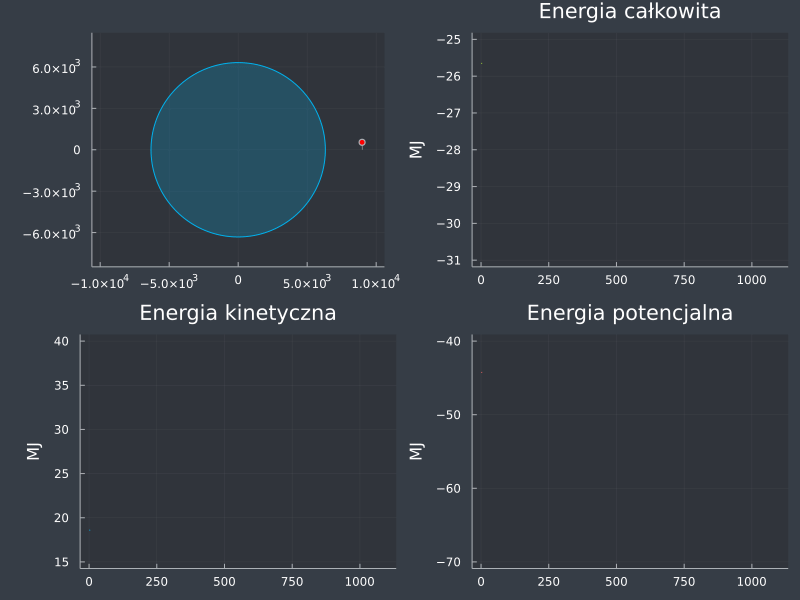

In [2]:
traj2 = pure_trajectory(9000, [0, 6.098], 1, 1120, 30)

Velocity = Vector{Float64}(undef, 1121)
for i in 1:1121
    Velocity[i] = get_length(traj2[3][i])
end

K = [1*Velocity[i]^2/2 for i in 1:1121]
P = [-(6.67*5.97*1/traj2[4][i])*10^4 for i in 1:1121]

theme(:dark)
an = @animate for k in 1:280
    if k < 80
        i = 1
    else
        i = 4k - 319
    end
    p1 = plot(K[1:4k], xlims=[0,1101], ylims=[15, 40], title="Energia kinetyczna", legend=false, color=:deepskyblue, ylabel="MJ")
    p2 = plot(P[1:4k], xlims=[0,1101], ylims=[-70, -40], title="Energia potencjalna", legend=false, color=:indianred1, ylabel="MJ")
    p3 = plot((P+K)[1:4k], xlims=[0,1101], ylims=[-31, -25], title="Energia całkowita", legend=false, color=:olivedrab2, ylabel="MJ")
    
    p4 = plot(circle(6317), seriestype = [:shape], c = :deepskyblue, linecolor = :deepskyblue2,
    legend = false, fillalpha = 0.2, aspect_ratio = 1,
    xlims=[-10^4, 10^4], ylims=[-8*10^3, 8*10^3])
    p4 = plot!(traj2[1][i:4k], traj2[2][i:4k], color=:gray)
    p4 = scatter!([traj2[1][4k]], [traj2[2][4k]], color=:red, markersize=4)
    
    plot(p4, p3, p1, p2, layout=(2, 2), size=(800, 600))
end
gif(an,"Energia2.gif", fps = 10)

Najpierw rozpatrzymy zmiany energii w sytuacji, w której nie bierzemy pod uwagę oporu powietrza. \
Energia całkowita pozostaje niezmienna (na powyższym wykresie nieznacznie się zmienia, jednak jest to spowodowane robionymi przez nas przybliżeniami oraz jest właściwie niezauważalne).

Warto przypomnieć wzory na energię całkowitą i potencjalną w centralnym polu grawitacyjnym:

$E_k=\frac{1}{2}mv^2\tag{7}$

$E_p=-\frac{\mathrm{G}Mm}{r}\tag{8}$

gdzie:\
$E_p$ - energia potencjalna $[\text{J}]$\
$E_k$ - energia kinetyczna $[\text{J}]$\
$M$ - masa źródła pola grawitacyjnego $[\text{kg}]$\
$m$ - masa ciała obiegającego ciało o masie $M$\
$v$ - prędkość, z jaką porusza się ciało $\left[\frac{\text{km}}{\text{s}}\right]$\
$r$ - odległość między ciałami $[\text{km}]$

Energia grawitacji jest ujemna, bo wzrost odległości między ciałami musi powodować wzrost energii potencjalnej. Biorąc pod uwagę wzór, im większa jest odległość, tym mniejsza by była energia co do wartości bezwzględnej. W nieskończoności energia potencjalna ma wartość równą zero, wobec czego, przyjmujemy, że jest ujemna.

Energia kinetyczna z kolei maleje wraz ze wzrostem odległości od planety. Osiąga swoje maksimum w peryhelium, a minimum w aphelium, odwrotnie do energii potencjalnej.

┌ Info: Saved animation to 
│   fn = C:\Users\olkar\rówania\Energia1.gif
└ @ Plots C:\Users\olkar\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\olkar\\rówania\\Energia1.gif")
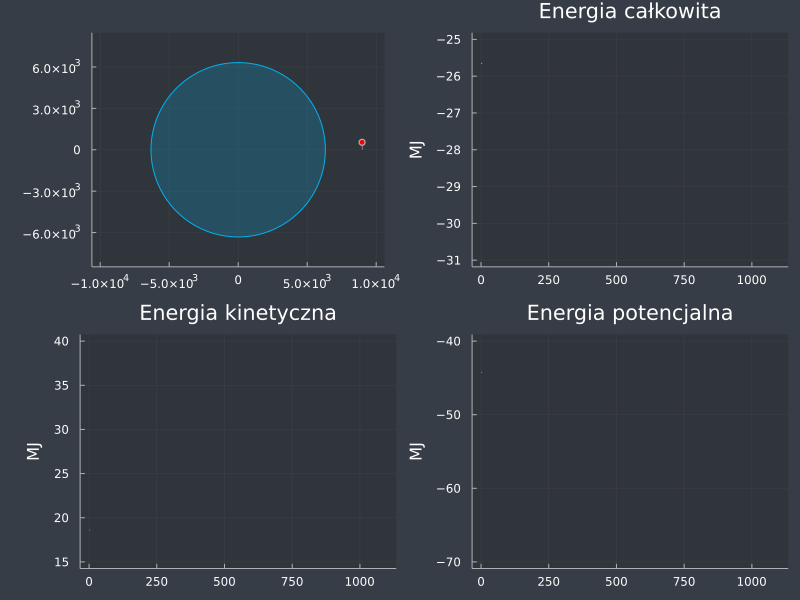

In [3]:
traj = trajectory(9000, [0, 6.098], 1, 0.05, 5, 1120, 30)

Velocity = Vector{Float64}(undef, 1121)
for i in 1:1121
    Velocity[i] = get_length(traj[3][i])
end

K = [1*Velocity[i]^2/2 for i in 1:1121]
P = [-(6.67*5.97*1/traj[4][i])*10^4 for i in 1:1121]

an = @animate for k in 1:280
    if k < 80
        i = 1
    else
        i = 4k - 319
    end
    p1 = plot(K[1:4k], xlims=[0,1101], ylims=[15, 40], title="Energia kinetyczna", legend=false, color=:deepskyblue, ylabel="MJ")
    p2 = plot(P[1:4k], xlims=[0,1101], ylims=[-70, -40], title="Energia potencjalna", legend=false, color=:indianred1, ylabel="MJ")
    p3 = plot((P+K)[1:4k], xlims=[0,1101], ylims=[-31, -25], title="Energia całkowita", legend=false, color=:olivedrab2, ylabel="MJ")
    
    p4 = plot(circle(6317), seriestype = [:shape], c = :deepskyblue, linecolor = :deepskyblue2,
    legend = false, fillalpha = 0.2, aspect_ratio = 1,
    xlims=[-10^4, 10^4], ylims=[-8*10^3, 8*10^3])
    p4 = plot!(traj[1][i:4k], traj[2][i:4k], color=:gray)
    p4 = scatter!([traj[1][4k]], [traj[2][4k]], color=:red, markersize=4)
    
    plot(p4, p3, p1, p2, layout=(2, 2), size=(800, 600))
end
gif(an,"Energia1.gif", fps = 10)

Teraz przyjrzymy się sytuacji, w której uwzględniony jest opór powietrza.

$m\frac{d^2r}{dt^2}=-\frac{1}{2}dC_DA|v|v\tag{9}=F_D$

gdzie:\
$F_D$ - siła oporu $[\text{kN}]$\
$d$ - gęstośc powietrza $\left[\frac{\text{kg}}{\text{m}^3}\right]$\
$v$ - prędkość ciała $\left[\frac{\text{km}}{\text{s}}\right]$\
$C_D$ - współczynnik oporu\
$A$ - pole przekroju ciała $\left[\text{m}^3\right]$

Dodatkowo poza równaniem $(1)$ rozwiązujemy teraz równanie $(9)$. Za stałe przyjęliśmy $C_D=0.05$ i $A=5 \text{ m}^3$. Dane dotyczące gęstości powietrza$^{[8]}$ dopasowaliśmy do funkcji wykładniczej, w celu uproszczenia działania algorytmu. 

Energia całkowita nie jest stała. Maleje schodkowo, przy czym moment spadku przypada na moment znalezienia się w punkcie peryhelium.

Jeżeli przyjrzymy wykresom energii, to zauważymy, że zarówno energia kinetycznej jak i potencjalna przy każdym kolejnym okrążeniu nie mają aż tak dużych zmian w peryhelium jak w aphelium.

Przy każdym kolejnym okrążeniu aphelium staje się coraz mniejsze.

# Krzywe stożkowe

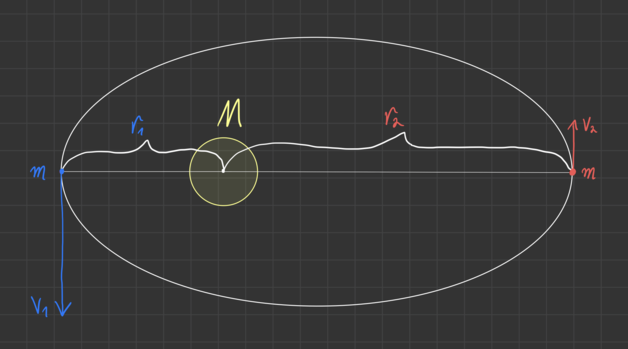
<center>$\textit{Rys. 1}$

Dla dwóch ciał o masach $m$, $M$, gdzie $M$>>$m$ z Pierwszego Prawa Keplera wynika, że ciało o masie $m$ poruszać się będzie po elipsie o ognisku w środku masy cięższego ciała (patrz $\textit{Rys. 1}$). Korzystając z zasady zachowania energii oraz zasady zachowania momentu pędu możemy zapisać $^{[9]}$:

$E=\frac{mv_1^2}{2}-\mathrm{G}\frac{mM}{r_1}=\frac{mv_2^2}{2}\tag{10}-\mathrm{G}\frac{mM}{r_2}$

$L=mv_1r_1=mv_2r_2\tag{11}$

gdzie:\
$E$ - całkowita energia orbitalna ciała o masie $m$ (suma energii kinetycznej i potencjalnej) $[\text{J}]$\
$L$ - moment pędu ciała o masie $m$ $\left[\frac{\text{kg}\cdot\text{m}^{2}}{\text{s}}\right]$\
$r_1$ - odległość ogniska od elipsy w peryhelium $[\text{km}]$\
$r_2$ - odległość ogniska od elipsy w aphelium $[\text{km}]$\
$v_1$ - prędkość ciała o masie $m$ w peryhelium $\left[\frac{\text{km}}{\text{s}}\right]$\
$v_2$ - prędkość ciała o masie $m$ w aphelium $\left[\frac{\text{km}}{\text{s}}\right]$\
$\mathrm{G}$ - stała grawitacji $\left[\frac{\text{N}\cdot\text{m}^{2}}{\text{kg}^{2}}\right]$

Odejmując energie w peryhelium i aphelium oraz skracając $m$ dostajemy:

$\frac{1}{2}(v_1^2-v_2^2)-\mathrm{G}M(\frac{1}{r_1}-\frac{1}{r_2})\tag{12}=0$

Zmieniając kolejność członów i podstawiając $v_1=\frac{L}{mr_1}$ i $v_2=\frac{L}{mr_2}$ mamy:

$\frac{L^2}{2m^2}(\frac{1}{r_1^2}-\frac{1}{r_2^2})=\mathrm{G}M(\frac{1}{r_1}-\frac{1}{r_2})\tag{13}$

Skąd po uproszczeniu:

$\frac{L^2}{2m}(\frac{1}{r_1}+\frac{1}{r_2})=\mathrm{G}Mm\tag{14}$

Następnie dodamy energie w peryhelium i aphelium oraz podstawimy $v_1=\frac{L}{mr_1}$ i $v_2=\frac{L}{mr_2}$, dzięki czemu otrzymamy:

$2E=\frac{L^2}{2m}(\frac{1}{r_1^2}+\frac{1}{r_2^2})-\mathrm{G}Mm(\frac{1}{r_1}+\frac{1}{r_2})\tag{15}$

Korzystając z $(10)$ oraz zapisując $(\frac{1}{r_1^2}+\frac{1}{r_2^2})=(\frac{1}{r_1}+\frac{1}{r_2})^2-\frac{2}{r_1r_2}$ mamy:

$E=-\frac{\mathrm{G}Mm}{r_1+r_2}=-\frac{\mathrm{G}Mm}{2a}\tag{16}$

gdzie $a$ to półoś wielka elipsy, $a>0$.\
Wzór $(16)$ możemy uogólnić dla niedodatnich i nieskończonych $a$, co da nam wszystkie krzywe stożkowe.\
Możemy teraz przeanalizować co się będzie działo z torem naszego ciała dla różnych wartości energii. Przekształcając wzór $(16)$ otrzymamy:

$a=-\frac{\mathrm{G}Mm}{2E}\tag{17}$

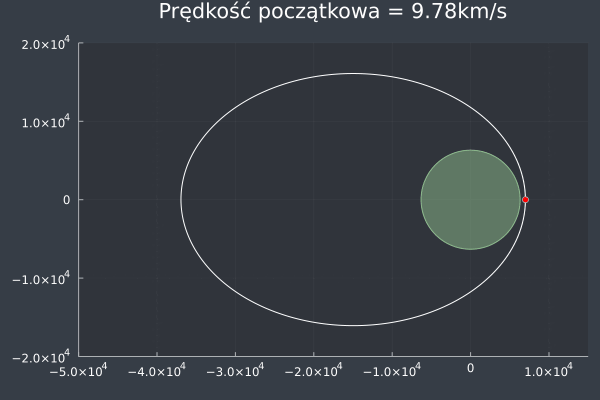
<center>$\textit{Fig. 1}$ Elipsa</center>

W równaniu $(17)$ dla $E<0$ dostajemy $a>0$, co daje nam ruch ciała po elipsie ($\textit{Fig. 1}$).

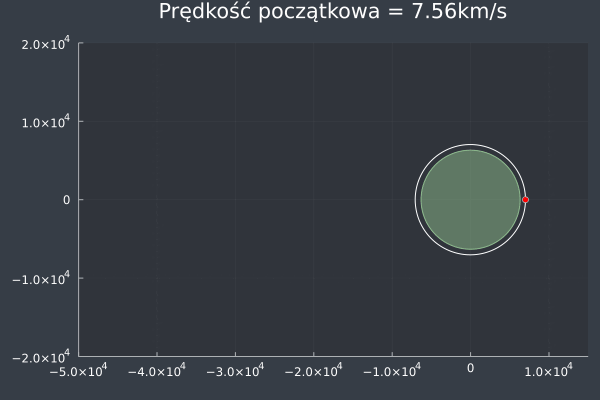
<center>$\textit{Fig. 2}$ Okrąg</center>

Ruch ciała po okręgu ($\textit{Fig. 2}$) jest specjalnym przypadkiem ruchu po elipsie. Wiedząc, że wysokość nie bedzie się zmieniała (półoś wielka $a=r_0$), oraz prędkość będzie stale równa $v_0$, możemy zapisać równanie $(17)$ jako:

$r_0=-\mathrm{G}\frac{Mm}{2E}\tag{18}$

Mnożąc obustronie przez $2E$ i rozpisując energię na sumę energii kinetycznej i potencjalnej mamy:

$mr_0v_0^2-2\mathrm{G}Mm=-\mathrm{G}Mm\tag{19}$

Po uproszczeniu i znalezieniu $v_0$ dostajemy:

$v_0=\sqrt{\mathrm{G}\frac{M}{r_0}}=v_I\tag{20}$

Prędkość $v_I$ nazywamy pierwszą prędkością kosmiczną.

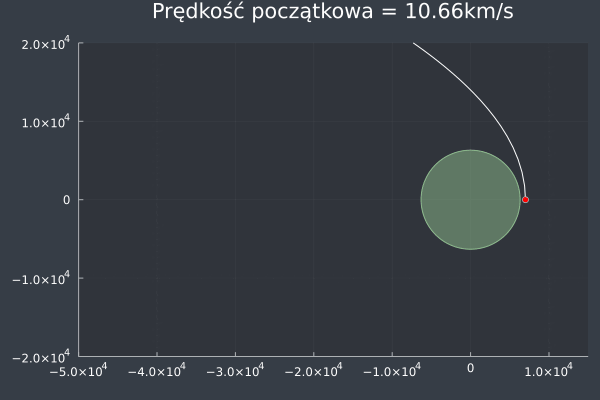
<center>$\textit{Fig. 3}$ Parabola</center>

W równaniu $(17)$ dla $E=0$ dostajemy $a=\infty$, co daje nam ruch ciała po paraboli ($\textit{Fig. 3}$). Rozpisując energię na sumę energii kinetycznej i potencjalnej w punkcie początkowym dostajemy:

$\frac{mv_0^2}{2}-\mathrm{G}\frac{Mm}{r_0}=0\tag{21}$

Co po przekształceniach daje nam:

$v_0=\sqrt{2\mathrm{G}\frac{M}{r_0}}=v_{II}\tag{22}$

Prędkość $v_{II}$ nazywamy drugą prędkością kosmiczną (lub prędkością paraboliczną z uwagi na powiązaną z nią krzywą).

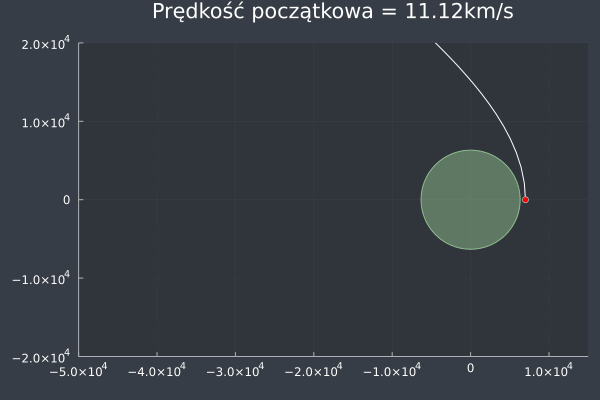
<center>$\textit{Fig. 4}$ Hiperbola</center>

W równaniu $(17)$ dla $E>0$ dostajemy $a<0$ co daje nam ruch ciała po hiperbolii ($\textit{Fig. 4}$).

┌ Info: Saved animation to 
│   fn = C:\Users\olkar\rówania\krzywe.gif
└ @ Plots C:\Users\olkar\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\olkar\\rówania\\krzywe.gif")
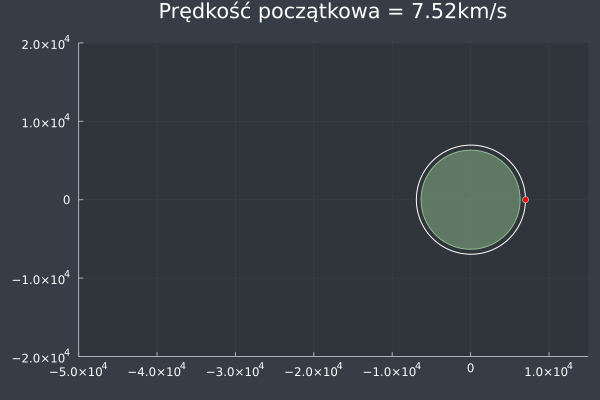

In [4]:
theme(:dark)
an = @animate for k in 1:200
    traj = pure_trajectory(7000, [0, 7.5+0.02*k], 1, 1000, 10+2k)
    plot(circle(6317), seriestype = [:shape], c = :darkseagreen, linecolor = :darkseagreen,
     legend = false, fillalpha = 0.5, aspect_ratio = 1,title = "Prędkość początkowa = $(round(7.5+0.02*k, digits=3))km/s",
     xlims=(-5*10^4, 1.5*10^4), ylims=(-2*10^4, 2*10^4))
    plot!(traj[1], traj[2], color=:white)
    scatter!([traj[1][1]], [traj[2][1]], color=:red)
    end
    gif(an,"krzywe.gif", fps = 12)

Powyższy gif przedstawia jak zwiększając energię orbitalną zmienia się tor ruchu ciała. Kolejne klatki animacji to rozwiązania równania $(1)$ z warunkami początkowymi, gdzie wysokość $r_0$ nie zmienia się ($r_0=7000$ km), ale prędkość $v_0$ jest coraz większa.

Analizując rozwiązania równania $(1)$ dla różnych warunków początkowych, możemy wnioskować że dla $v_0$, $r_0$ takich że:
- $v_0=\sqrt{\mathrm{G}\frac{M}{r_0}}$ - ciało porusza się po okręgu,
- $\sqrt{\mathrm{G}\frac{M}{r_0}}<v_0<\sqrt{2G\frac{M}{r_0}}$ - ciało porusza się po elipsie,
- $v_0=\sqrt{2\mathrm{G}\frac{M}{r_0}}$ - ciało porusza się po paraboli,
- $v_0>\sqrt{2\mathrm{G}\frac{M}{r_0}}$ - ciało porusza się po hiperbolii.

# Asysta grawitacyjna

┌ Info: Saved animation to 
│   fn = C:\Users\olkar\rówania\katapultazwykresem.gif
└ @ Plots C:\Users\olkar\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\olkar\\rówania\\katapultazwykresem.gif")
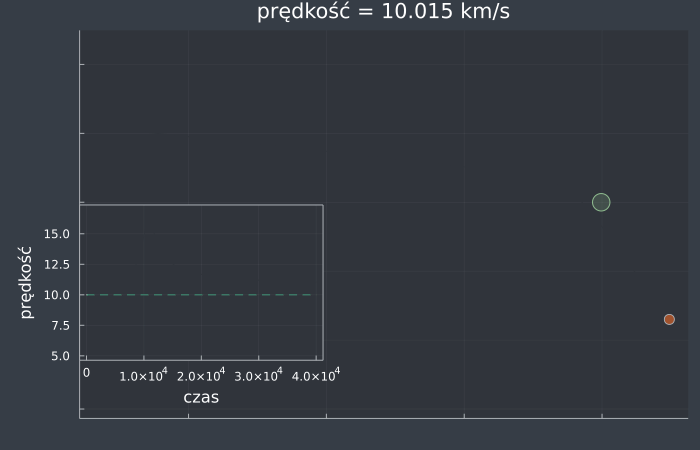

In [5]:
T = 40000
Y = [0 for i in 1:T]
X = [-3i for i in 1:T]

traj = trajectory1(X, Y, 100000, rotate_vector([0, 10.0], pi/5), -pi/3, 1, T)

Velocity = Vector{Float64}(undef, T)
for i in 1:T
    Velocity[i] = get_length1(traj[3][i], [0, 0])
end

theme(:dark)
an = @animate for k in 1:200
    p = plot(traj[1], traj[2], color=("#30343B"), title = "prędkość = $(round(Velocity[200k], digits=3)) km/s", size=(700, 450),
    inset = (1, bbox(0.0, 0.45, 0.4, 0.4)), foreground_color_text=("#363D46"))
    plot!(p[1], circle1(X[200*k], Y[200*k], 6317), seriestype = [:shape], c = :darkseagreen, linecolor = :darkseagreen,
     legend = false, fillalpha = 0.2, aspect_ratio = 1)
     plot!(p[1], traj[1][1:200k], traj[2][1:200k], color=:white)
     scatter!(p[1], [traj[1][200k]], [traj[2][200k]], color=:sienna, linecolor=:sienna, markersize=6)
     plot!(p[2], Velocity, color=("#30343B"), foreground_color_text=:white, legend=false, framestyle=:box, xlabel="czas", ylabel="prędkość", ylims=[5,17])
     plot!(p[2], Velocity[1:200k], color=:white)
     plot!(p[2], [0, 4*10^4], [10, 10], linestyle=:dash)
end
gif(an,"katapultazwykresem.gif", fps = 25)

Asysta grawitacyjna jest wykorzystywana do zmiany kierunku ruchu oraz prędkości jednego ciała (statku kosmicznego) dzięki polu grawitacyjnemu planety lub innego dużego ciała niebieskiego. Nazywana jest także katapultą grawitacyjną. Największym ograniczeniem tej metody jest fakt, że trzeba czekać, aż obiekt, który chcemy wykorzystać do zmienienia prędkości naszego ciała będzie w odpowiednim ułożeniu. Stanowi to szczególny problem, gdy planuje się użyć więcej niż jednej katapulty grawitacyjnej, tak jak w misji Voyager.

Możemy zaobserwować na powyższym gifie, jak mniejsze ciało reaguje na zbliżenie się do pola grawitacyjnego planety. Z wykresu widać, że początkowo ciało ma około 10 $\frac{\text{km}}{\text{s}}$. Po zbliżeniu się do większego obiektu gwałtownie zwiększa się prędkość, a jego tor ruchu ulega znacznemu zakrzywieniu. Prędkość wzrasta aż do 16 $\frac{\text{km}}{\text{s}}$. Po opuszczeniu strefy wpływu pola grawitacyjnego planety prędkość ciała powoli maleje i zbliża się do 11 $\frac{\text{km}}{\text{s}}$, czyli porusza się potem szybciej niż przed wejściem w kontakt z ciałem niebieskim.

Przy zilustrowanej powyżej sytuacji przyjmujemy, że punktem odniesienia jest Słońce, wokół którego poruszają się ciało i planeta. Biorąc za układ odniesienia planetę, ruch będzie przebiegał jak przy normalnym spotkaniu stacjonarnej planety i naszego ciała. Oznacza to tyle, że względem samej planety nie zyskujemy dodatkowej prędkości.

# Misja kosmiczna

Naszym następnym krokiem będzie przeprowadzenie symulacji wystrzelenia rakiety, która jest mocno inspirowana wcześniej przez nas wspomnianą misją Voyager 1. Ze względu na problem ze znalezieniem dokładnych danych, do symulacji dopasowaliśmy wartości poszczególnych zmiennych tak, aby misja w jak największym stopniu przypominała misję Voyager 1.

Podzieliliśmy naszą misję kosmiczną na pięć faz, żeby móc lepiej zilustrować, co się dzieje z rakietą. Każda faza jest bezpośrednią kontynuacją poprzedniej. Podział na fazy wynika ze zmieniających się wektorów siły silnika w każdej z nich, przez co znacznie wygodniej jest zrobić osobne symulacje, gdzie wartościami początkowymi pojedynczej symulacji są wartości końcowe poprzedniej.

W tej części projektu na ciało działa dodatkowa siła związana z pracą silników. Będziemy używać tych samych metod, co we wcześniejszych częściach, jednak od teraz rozważamy rakietę, której masa jest zmienna. Jest to spowodowane wyrzucaniem z dużą prędkością przez silnik produktów spalania, co wytwarza siłę ciągu, która umożliwia przyspieszenie. Algorytm zmienia się nieznacznie, gdyż co iteracje zmieniamy masę rakiety. W symulacjach przyjmujemy, że siła ciągu jest stała, a masa paliwa maleje liniowo.

Utrata masy jest korzystna, ponieważ lżejsze ciało jest w stanie szybciej przyspieszać.

Na każdej z wizualizacji poszczególnych etapów misji zaznaczone jest linią przerywaną, jak wyglądałaby trajektoria rakiety, gdyby wyłączono jej silniki w danym momencie (jeżeli ich akurat używa). W tych fazach, w których używane jest paliwo po prawej stronie zamieszczony jest wykres słupkowy, który wskazuje na pozostałą ilość paliwa z obecnie realizowanego etapu w danym momencie.

## Faza I

┌ Info: Saved animation to 
│   fn = C:\Users\olkar\rówania\faza1.gif
└ @ Plots C:\Users\olkar\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\olkar\\rówania\\faza1.gif")
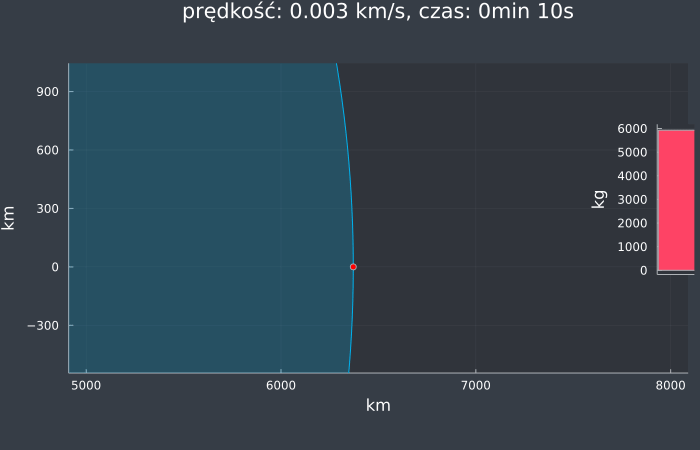

In [6]:
traj = trajectory2(6371, [0, 0], 10^4, 10, 0, [97, 4.0], 300, 2)
Velocity = get_Velocity(traj[3])
size = (700, 450)

theme(:dark)

an = @animate for k in 1:120
    if k <= 60
        p = plot(circle(6371), seriestype = [:shape], c = :deepskyblue, linecolor = :deepskyblue2, size=size,
        legend = false, fillalpha = 0.2, aspect_ratio = 1,
        xlims=[5*10^3, 8*10^3], ylim=[-500, 1000],
        inset = (1, bbox(0.95, 0.25, 0.06, 0.4)),
        title="prędkość: $(round(Velocity[5k], digits=3)) km/s, czas: $(div(5k*2,60))min $(mod(5k*2,60))s", xlabel="km", ylabel="km")
        plot!(p[1], traj[1][1:5k], traj[2][1:5k], color=:white)
        trace = trajectory3(traj[4][5k], traj[3][5k], 722, traj[5][5k], 250, 5)
        n = findfirst(x->x<6371, trace[4]) 
        plot!(p[1], trace[1][1:n], trace[2][1:n], linestyle=:dash, color=:gray)
        scatter!(p[1], [traj[1][5k]], [traj[2][5k]], color=:red)
        bar(p[2], [traj[6][5k]-4000], legend=false,
        ylims=[0, 0.6*10^4], xlims=[0.6, 0.8], xticks=false, xlabel="", ylabel="kg")
    else
        p = plot(circle(6371), seriestype = [:shape], c = :deepskyblue, linecolor = :deepskyblue2, size=size,
        legend = false, fillalpha = 0.2, aspect_ratio = 1,
        xlims=[5*10^3, 8*10^3], ylim=[-500, 1000],
        inset = (1, bbox(0.95, 0.25, 0.06, 0.4)),
            title="prędkość: $(round(Velocity[end], digits=3)) km/s, czas: $(div(5*60*2,60))min $(mod(5*60*2,60))s", xlabel="km", ylabel="km")
        plot!(p[1], traj[1], traj[2], color=:white)
        trace = trajectory3(traj[4][end], traj[3][end], 722, traj[5][end], 250, 5)
        n = findfirst(x->x<6371, trace[4]) 
        plot!(p[1], trace[1][1:n], trace[2][1:n], linestyle=:dash, color=:gray)
        scatter!(p[1], [traj[1][end]], [traj[2][end]], color=:red)
        bar!(p[2], [traj[6][end]-4000], legend=false,
        ylims=[0, 0.6*10^4], xlims=[0.6, 0.8], xticks=false, xlabel="", ylabel="kg")
    end
end
gif(an,"faza1.gif", fps = 7)

Pierwszym etapem naszej misji jest wzniesienie się na odpowiednią wysokość ponad powierzchnię Ziemi, która jest naszym układem odniesienia. W naszym przypadku, oddalamy się od niej o 525 km. 

Przez 10 minut wykorzystywane jest tutaj 6000 kg paliwa stałego, którego masa maleje liniowo z czasem. Jest mniej wydajne niż paliwo płynne, ale jest od niego tańsze. Powyżej jest zilustrowane, jak szybko jest wykorzystywane.

## Faza II

┌ Info: Saved animation to 
│   fn = C:\Users\olkar\rówania\faza2.gif
└ @ Plots C:\Users\olkar\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\olkar\\rówania\\faza2.gif")
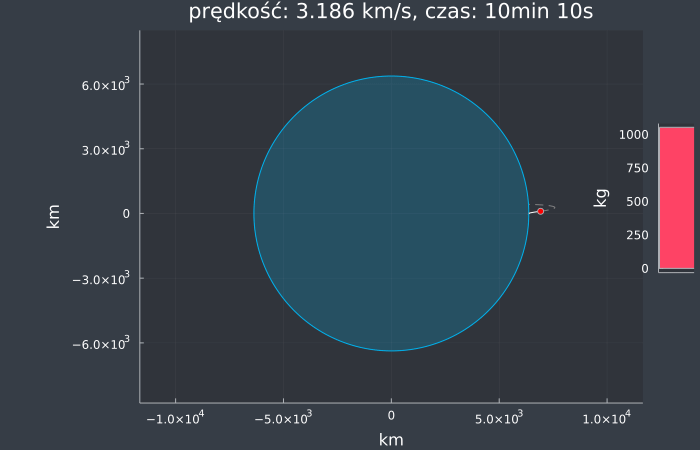

In [7]:
traj2 = trajectory2(traj[4][end], traj[3][end], traj[6][end], 1, traj[5][end], [4, 23], 525, 2)
Velocity2 = get_Velocity(traj2[3])

an = @animate for k in 1:155
    if k <= 105
        p = plot(circle(6371), seriestype = [:shape], c = :deepskyblue, linecolor = :deepskyblue2, size=size,
        legend = false, fillalpha = 0.2, aspect_ratio = 1,
        xlims=[-1.1*10^4, 1.1*10^4], ylim=[-8.3*10^3, 8*10^3],
        inset = (1, bbox(0.95, 0.25, 0.06, 0.4)),
        title="prędkość: $(round(Velocity2[5k], digits=3)) km/s, czas: $(div(5k*2+600,60))min $(mod(5k*2+600,60))s", xlabel="km", ylabel="km")
        plot!(p[1], traj[1], traj[2], color=:white)
        plot!(p[1], traj2[1][1:5k], traj2[2][1:5k], color=:white)
        trace = trajectory3(traj2[4][5k], traj2[3][5k], 722, traj2[5][5k], 2000, 5)
        if findfirst(x->x<6400, trace[4]) isa Nothing 
            n = length(trace[4])
        else
            n = findfirst(x->x<6400, trace[4])
        end 
        plot!(p[1], trace[1][1:n], trace[2][1:n], linestyle=:dash, color=:gray)
        scatter!(p[1], [traj2[1][5k]], [traj2[2][5k]], color=:red)
        bar(p[2], [traj2[6][5k]-2950], legend=false,
        ylims=[0, 0.105*10^4], xlims=[0.6, 0.8], xticks=false, ylabel="kg", xlabel="")
    else
        p = plot(circle(6371), seriestype = [:shape], c = :deepskyblue, linecolor = :deepskyblue2, size=size,
        legend = false, fillalpha = 0.2, aspect_ratio = 1,
        xlims=[-1.1*10^4, 1.1*10^4], ylim=[-8.3*10^3, 8*10^3],
        inset = (1, bbox(0.95, 0.25, 0.06, 0.4)),
            title="prędkość: $(round(Velocity2[end], digits=3)) km/s, czas: $(div(5*105*2+600,60))min $(mod(5*105*2+600,60))s", xlabel="km", ylabel="km")
        plot!(p[1], traj[1], traj[2], color=:white)
        plot!(p[1], traj2[1], traj2[2], color=:white)
        trace = trajectory3(traj2[4][end], traj2[3][end], 722, traj2[5][end], 2000, 5)
        plot!(p[1], trace[1][1:1300], trace[2][1:1300], linestyle=:dash, color=:gray)
        scatter!(p[1], [traj2[1][end]], [traj2[2][end]], color=:red)
        bar!(p[2], [traj2[6][end]-2950], legend=false,
        ylims=[0, 0.105*10^4], xlims=[0.6, 0.8], xticks=false, ylabel="kg", xlabel="")
    end
end
gif(an,"faza2.gif", fps = 7)

Kolejna faza to osiągnięcie przez rakietę pierwszej prędkości kosmicznej podczas przyspieszania prostopadle do promienia Ziemi.

Tym razem użyte jest paliwo płynne, które ma dużą gęstość. Dzięki temu zbiorniki mogą mieć mniejszą masę,  a paliwo napędowe stanowi jej większą część, więc jest to dużym atutem. Ilość substancji w zbiorniku z paliwem zmniejsza się ono liniowo. Do tego etapu wykorzystano 1000 kg paliwa, które zostało zużyte w ciągu 17 minut i 30 sekund.

## Faza III

┌ Info: Saved animation to 
│   fn = C:\Users\olkar\rówania\faza3.gif
└ @ Plots C:\Users\olkar\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\olkar\\rówania\\faza3.gif")
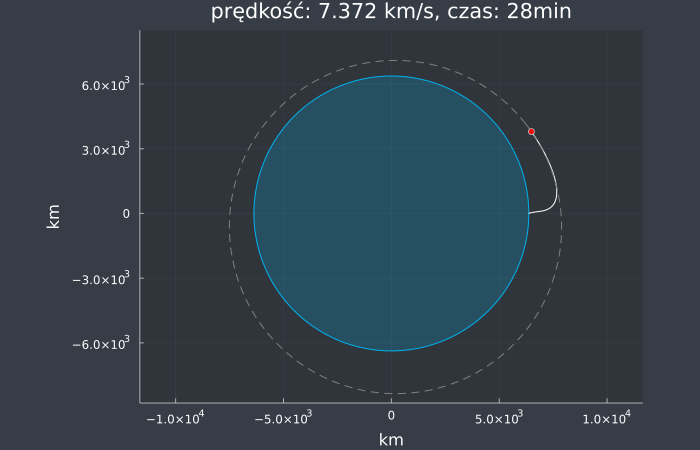

In [8]:
traj3 = trajectory2(traj2[4][end], traj2[3][end], traj2[6][end], 0, traj2[5][end], [0, 0], 2300, 3)
Velocity3 = get_Velocity(traj3[3])

an = @animate for k in 1:135
    if k < 85
        plot(circle(6371), seriestype = [:shape], c = :deepskyblue, linecolor = :deepskyblue2, size=size,
        legend = false, fillalpha = 0.2, aspect_ratio = 1,
        xlims=[-1.1*10^4, 1.1*10^4], ylim=[-8.3*10^3, 8*10^3],
        title="prędkość: $(round(Velocity3[10k], digits=3)) km/s, czas: $(div(10k*3+1650,60))min", xlabel="km", ylabel="km")
        plot!(traj[1], traj[2], color=:white)
        plot!(traj2[1], traj2[2], color=:white)
        plot!(traj3[1], traj3[2], linestyle=:dash, color=:grey)
        plot!(traj3[1][1:10k], traj3[2][1:10k], color=:white)
        scatter!([traj3[1][10k]], [traj3[2][10k]], color=:red)
    else
        plot(circle(6371), seriestype = [:shape], c = :deepskyblue, linecolor = :deepskyblue, size=size,
        legend = false, fillalpha = 0.2, aspect_ratio = 1,
        xlims=[-1.1*10^4, 1.1*10^4], ylim=[-8.3*10^3, 8*10^3],
            title="prędkość: $(round(Velocity3[end], digits=3)) km/s, czas: $(div(10*85*3+1650,60))min", xlabel="km", ylabel="km")
        plot!(traj[1], traj[2], color=:white)
        plot!(traj2[1], traj2[2], color=:white)
        plot!(traj3[1], traj3[2], linestyle=:dash, color=:grey)
        plot!(traj3[1][1:850], traj3[2][1:850], color=:white)
        scatter!([traj3[1][850]], [traj3[2][850]], color=:red)
    end
end
gif(an,"faza3.gif", fps = 7)

W tej fazie nie używamy silników do lotu. Prędkość zachowuje się tak jak powinna w ruchu po orbicie, czyli rośnie zbliżając się do peryhelium i maleje, kiedy się od niego oddala.

Rakieta leci przez ponad 40 minut, aż nie znajdzie się w pozycji, w której jest gotowa do rozpoczęcia przyspieszania.

## Faza IV

┌ Info: Saved animation to 
│   fn = C:\Users\olkar\rówania\faza4.gif
└ @ Plots C:\Users\olkar\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\olkar\\rówania\\faza4.gif")
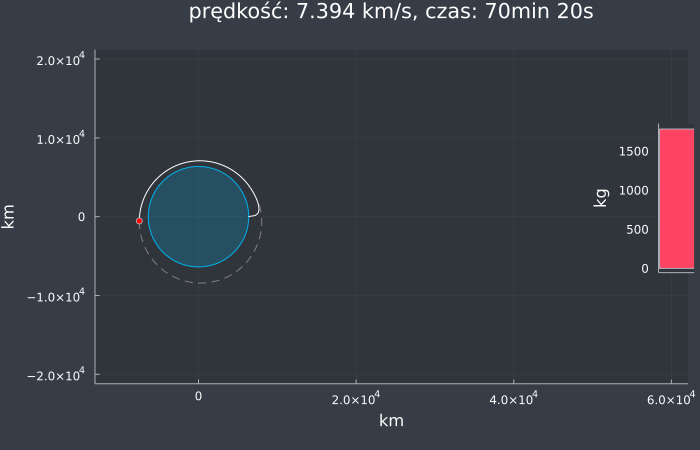

In [9]:
traj4 = trajectory2(traj3[4][850], traj3[3][850], traj3[6][850], 0.9, traj3[5][850], [0, 5.0], 1000, 2)
Velocity4 = get_Velocity(traj4[3])

an = @animate for k in 1:150
    if k <= 100
        p = plot(circle(6371), seriestype = [:shape], c = :deepskyblue, linecolor = :deepskyblue2, size=size,
        legend = false, fillalpha = 0.2, aspect_ratio = 1,
        xlims=[-1.1*10^4, 6*10^4], ylim=[-2*10^4, 2*10^4],
        inset = (1, bbox(0.95, 0.25, 0.06, 0.4)),
        title="prędkość: $(round(Velocity4[10k], digits=3)) km/s, czas: $(div(4200+10k*2,60))min $(mod(4200+10k*2,60))s", xlabel="km", ylabel="km")
        plot!(p[1], traj[1], traj[2], color=:white)
        plot!(p[1], traj2[1], traj2[2], color=:white)
        plot!(p[1], traj3[1][1:850], traj3[2][1:850], color=:white)
        plot!(p[1], traj4[1][1:10k], traj4[2][1:10k], color=:white)
        trace = trajectory3(traj4[4][10k], traj4[3][10k], 722, traj4[5][10k], 2000, k+1) 
        plot!(p[1], trace[1][1:term(trace[1], trace[2])], trace[2][1:term(trace[1], trace[2])], linestyle=:dash, color=:gray)
        scatter!(p[1], [traj4[1][10k]], [traj4[2][10k]], color=:red)
        bar(p[2], [traj4[6][10k]-1162], legend=false,
        ylims=[0, 0.18*10^4], xlims=[0.6, 0.8], xticks=false, xlabel="", ylabel="kg")
    else
        p = plot(circle(6371), seriestype = [:shape], c = :deepskyblue, linecolor = :deepskyblue, size=size,
        legend = false, fillalpha = 0.2, aspect_ratio = 1,
        xlims=[-1.1*10^4, 6*10^4], ylim=[-2*10^4, 2*10^4],
        inset = (1, bbox(0.95, 0.25, 0.06, 0.4)),
            title="prędkość: $(round(Velocity4[end], digits=3)) km/s, czas: $(div(4200+10*100*2,60))min $(mod(4200+10*100*2,60))s", xlabel="km", ylabel="km")
        plot!(p[1], traj[1], traj[2], color=:white)
        plot!(p[1], traj2[1], traj2[2], color=:white)
        plot!(p[1], traj3[1][1:850], traj3[2][1:850], color=:white)
        plot!(p[1], traj4[1], traj4[2], color=:white)
        trace = trajectory3(traj4[4][end], traj4[3][end], 722, traj4[5][end], 2000, 5) 
        plot!(p[1], trace[1], trace[2], linestyle=:dash, color=:gray)
        scatter!(p[1], [traj4[1][end]], [traj4[2][end]], color=:red)
        bar(p[2], [traj4[6][end]-1162], legend=false,
        ylims=[0, 0.18*10^4], xlims=[0.6, 0.8], xticks=false, xlabel="", ylabel="kg")
    end
end
gif(an,"faza4.gif", fps = 7)

Kolejnym krokiem jest rozpędzenie się rakiety do drugiej prędkości kosmicznej, które jest niezbędne do opuszczenia pola grawitacyjnego Ziemi.

Ponownie włączane są silniki, które działają na paliwo płynne, tak samo jak w drugiej fazie. Tym razem wykorzystane zostało 1500 kg tej substancji.

Przy użyciu paliwa statek zwiększa swoją prędkość, a tym samym wzrasta energia układu oraz długość aphelium do momentu, aż torem ruchu przestaje być elipsa i zaczyna hiperbola.

## Faza V

┌ Info: Saved animation to 
│   fn = C:\Users\olkar\rówania\asysta+bez.gif
└ @ Plots C:\Users\olkar\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\olkar\\rówania\\asysta+bez.gif")
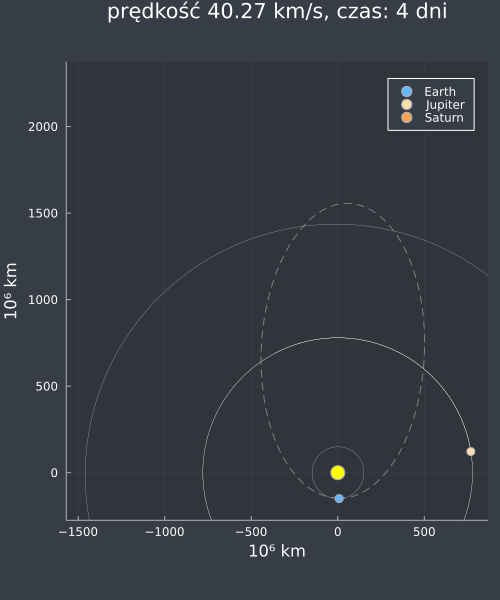

In [10]:
Earth = p_trajectory(149.6, [0, 2.57299], -pi/2, 1, 10000)
Jupiter = p_trajectory(778.479, [0, 1.12838], 0, 1, 10000)
Saturn = p_trajectory(1432.041, [0, 0.83635], 0, 1, 10000)
trace = trajectory4(Earth[1], Earth[2], Jupiter[1], Jupiter[2], Saturn[1], Saturn[2], 150, [0, 3.47892],-pi/2, 1, 2464, 2)

Earth = p_trajectory(149.6, [0, 2.57299], -pi/2, 1, 10000)
Jupiter = p_trajectory(778.479, [0, 1.12838], pi/20.5, 1, 10000)
Saturn = p_trajectory(1432.041, [0, 0.83635], pi/3.55, 1, 10000)
traj = trajectory4(Earth[1], Earth[2], Jupiter[1], Jupiter[2], Saturn[1], Saturn[2], 150, [0, 3.47892],-pi/2, 1, 900, 2)
Velocity = get_Velocity(traj[3])/(24*3600)*10^6
size=(500, 600)

an = @animate for k in 1:450+25
    if k <=450
        scatter([0], [0], color=:yellow, markersize=8, aspect_ratio=1, size=size,
        xlims=[-1.5*10^3, 0.8*10^3], ylims=[-200, 2.3*10^3],
        title="prędkość $(round(Velocity[2k], digits=2)) km/s, czas: $(2k*2) dni", label=false,
        xlabel="10⁶ km", ylabel="10⁶ km")
        plot!(trace[1], trace[2], linestyle=:dash, color=:gray, label=false)
        plot!(traj[1][1:2k], traj[2][1:2k], color=:white, label=false)
        scatter!([traj[1][2k]], [traj[2][2k]], color=:red, label=false, markersize=3.5)
        plot!(Earth[1][1:400], Earth[2][1:400], linewidth=0.2, label=false, color=:white)
        scatter!([Earth[1][4k]], [Earth[2][4k]], label="Earth", color=:steelblue1, markersize=5.5)
        plot!(Jupiter[1], Jupiter[2], linewidth=0.2, label=false, color=:white)
        scatter!([Jupiter[1][4k]], [Jupiter[2][4k]], label="Jupiter", color=:navajowhite1, markersize=5.5)
        plot!(Saturn[1], Saturn[2], linewidth=0.2, label=false, color=:white)
        scatter!([Saturn[1][4k]], [Saturn[2][4k]], label="Saturn", color=:tan1, markersize=5.5)
    else
        scatter([0], [0], color=:yellow, markersize=8, aspect_ratio=1, size=size,
        xlims=[-1.5*10^3, 0.8*10^3], ylims=[-200, 2.3*10^3],
        title="prędkość $(round(Velocity[2*450], digits=2)) km/s, czas: $(2*450*2) dni", label=false,
        xlabel="10⁶ km", ylabel="10⁶ km")
        plot!(trace[1], trace[2], linestyle=:dash, color=:gray, label=false)
        plot!(traj[1][1:2*450], traj[2][1:2*450], color=:white, label=false)
        scatter!([traj[1][2*450]], [traj[2][2*450]], color=:red, label=false, markersize=3.5)
        plot!(Earth[1][1:400], Earth[2][1:400], linewidth=0.2, label=false, color=:white)
        scatter!([Earth[1][4*450]], [Earth[2][4*450]], label="Earth", color=:steelblue1, markersize=5.5)
        plot!(Jupiter[1], Jupiter[2], linewidth=0.2, label=false, color=:white)
        scatter!([Jupiter[1][4*450]], [Jupiter[2][4*450]], label="Jupiter", color=:navajowhite1, markersize=5.5)
        plot!(Saturn[1], Saturn[2], linewidth=0.2, label=false, color=:white)
        scatter!([Saturn[1][4*450]], [Saturn[2][4*450]], label="Saturn", color=:tan1, markersize=5.5)
    end

end
gif(an,"asysta+bez.gif", fps = 18)

W tej części misji kosmicznej przyjmujemy Słońce za nasz układ odniesienia. Ciało po opuszczeniu pola grawitacyjnego Ziemi zmierza w kierunku Jowisza i wykorzystując katapultę grawitacyjną przyspiesza i zakrzywia swój kierunek ruchu. Następnie to samo dzieje się w przypadku Saturna.

Przy przelocie obok Jowisza prędkość zwiększa się bardziej niż przy wykorzystaniu Saturna. Asysta pierwszej z tych planet sprawia, że przyśpieszamy o ponad 9 $\frac{\text{km}}{\text{s}}$, a przy drugiej z nich już tylko o około 1,5 $\frac{\text{km}}{\text{s}}$.  Wynika to z faktu, że masa Jowisza jest ponad 3 razy większa od masy Saturna. Ciało o większej masie ma więcej energii kinetycznej i w związku z tym jest w stanie oddać więcej energii rakiecie, która korzysta z jego asysty grawitacyjnej.

Poprzednie cztery etapy trwały łącznie niewiele ponad 100 minut. Dotarcie do Jowisza zajmuje ponad 500 dni, a w momencie mijania Saturna misja trwa ponad 1000 dni.

Gdyby nie oddziaływanie między rakietą a tymi dwoma planetami, nasze ciało poruszałoby się po orbicie eliptycznej wokół Słońca, która jest zaznaczona przerywaną linią na powyższym gifie.

# Wnioski

Podsumujmy teraz cały nasz projekt. Udało nam się przedstawić analizę wraz z wizualizacją ruchu ciał w polu grawitacyjnym. Przedstawiliśmy jak zmieniają się rozwiązania równania Newtona związanego z siłą grawitacji w zależności od wartości warunków początkowych. Następnie korzystając z zaprezentowanego przez nas algorytmu, pokazaliśmy działanie asysty grawitacyjnej. Na koniec, stosując wszystkie powyższe zagadnienia, udało nam się zaprojektować symulację misji kosmicznej inspirowanej misją Voyager 1.

# Bibliografia

[1] [Voyager - Mission Timeline](https://voyager.jpl.nasa.gov/mission/timeline/), NASA Jet Propultion Laboratory [dostęp 2023-01-15]\
[2] [The Golden Record](https://voyager.jpl.nasa.gov/golden-record/), NASA Jet Propultion Laboratory [dostęp 2023-01-15]\
[3] B. Wszołek, [*Wprowadzenie do Astronomii (wydanie czwarte)*](http://astronomianova.org/pdf/wprowadzenie-do-astronomii.pdf), Obserwatorium Astronomiczne Królowej Jadwigi, Rzepiennik Biskupi 2018 \
[4]  [*Semi-major / Semi-minor axis of an ellipse*](https://www.mathopenref.com/ellipsesemiaxes.html), Math Open Reference [dostęp 2023-01-15] \
[5] [*Prędkość Kosmiczna*](https://encyklopedia.pwn.pl/haslo/predkosc-kosmiczna;3962198.html), PWN [dostęp 2023-01-15]\
[6] L. D. Landau, E. M. Lifshitz, *Mechanicks (third edition)*, Nauka, Moskwa 1993\
[7] H. Guściora, M. Sadowski, *Repetytorium z algebry liniowej*, Wydawnictwo Naukowe PWN, Warszawa 1997\
[8] [*U.S. Standard Atmosphere vs. Altitude*](https://www.engineeringtoolbox.com/standard-atmosphere-d_604.html), The Engineering Toolbox [dostęp 2023-01-15]\
[9] Michael Fowler, [*Elliptic Orbits: Paths to the Planets*](https://galileo.phys.virginia.edu/classes/152.mf1i.spring02/EllipticOrbits.htm) [dostęp 2023-01-15]